In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

%matplotlib inline
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
import matplotlib.cm as cm
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
from matplotlib import dates


#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv('최종데이터/전체데이터_독립+종속_1720.csv')
df

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,천명당_공원수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5
0,마산동부경찰서,0,0,0,5,5,0,0,30,185,...,0.320412,0.703934,3.562987,61.155591,6.313743,74.6,77.0,64.0,65.7,71.2
1,마산동부경찰서,1,0,0,6,5,0,0,36,185,...,0.324557,0.703934,3.573817,61.155591,7.472527,71.7,73.5,64.9,63.6,70.3
2,마산동부경찰서,2,0,0,5,4,0,0,34,185,...,0.328809,0.703934,3.584647,61.155591,9.313584,76.0,79.0,67.5,70.0,72.6
3,마산동부경찰서,3,0,0,6,6,0,0,31,185,...,0.333224,0.703934,3.584647,61.155591,9.941709,72.4,75.6,67.9,70.7,71.8
4,마산동부경찰서,4,0,0,7,6,0,0,36,185,...,0.337757,0.703934,3.595477,61.155591,11.609491,76.1,78.2,66.4,69.9,72.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,창원중부경찰서,2,1,0,8,6,1,0,56,201,...,0.386518,1.416245,5.748288,30.147271,9.309727,78.0,80.1,65.3,68.6,72.9
283,창원중부경찰서,3,1,0,6,6,1,0,58,201,...,0.388677,1.416245,5.789942,30.147271,10.205294,75.7,77.7,67.8,70.6,74.2
284,창원중부경찰서,4,0,0,8,7,0,0,52,201,...,0.390861,1.416245,5.800356,30.147271,13.308536,80.8,82.8,69.4,73.8,76.1
285,창원중부경찰서,5,0,0,7,11,0,0,56,201,...,0.392087,1.416245,5.852424,30.147271,14.349893,77.6,79.6,70.9,73.6,74.1


In [3]:
# df['천명당_범죄발생_강도살인'] = (df['범죄발생_강도']+df['범죄발생_살인'])/df['popu_num']*1000

In [4]:
df = df[['police','year','천명당_범죄발생_강도살인','천명당_범죄발생_강간추행','경찰 수/면적','면적당_cctv수','면적당_보안등수','남성비율','1인_남성비율','외국인_전체비율','외국인_남성비율','기초생활수급_비율','mur_safety_q2']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   police         287 non-null    object 
 1   year           287 non-null    int64  
 2   천명당_범죄발생_강도살인  287 non-null    float64
 3   천명당_범죄발생_강간추행  287 non-null    float64
 4   경찰 수/면적        287 non-null    float64
 5   면적당_cctv수      287 non-null    float64
 6   면적당_보안등수       287 non-null    float64
 7   남성비율           287 non-null    float64
 8   1인_남성비율        287 non-null    float64
 9   외국인_전체비율       287 non-null    float64
 10  외국인_남성비율       287 non-null    float64
 11  기초생활수급_비율      287 non-null    float64
 12  mur_safety_q2  246 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 29.3+ KB


In [6]:
df_p = df.loc[df['year']==6]

In [7]:
df2 = df.loc[df['year'].isin([0,1,2,3,4,5])]

In [8]:
df2 = df2.iloc[:,1:]

# 데이터분석
- StandardScaler 로 데이터 전처리
- 히트맵을 통해 상관분석
- 75:25 비율로 train:test 데이터 나눠서 모델 진행
- vif를 줄이는 쪽으로 변수 제거
- 선형회귀, 릿지, 라쏘, rf, xgboost, lightgbm 진행

## 히트맵을 통한 상관분석

In [9]:
# StandardScaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df2.iloc[:,:-1])
df2_scaled = scaler.transform(df2.iloc[:,:-1])
df2_scaled = pd.DataFrame(df2_scaled, index=df2.index, columns=df2.columns[:-1])
df2_scaled

,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
0,-1.46385,-0.518174,-0.769165,-1.229674,-1.326108,-1.199226,0.961697,0.137979,-0.830226,1.330305,-0.334887
1,-0.87831,-0.518174,-0.648213,-1.229674,-1.311719,-1.199226,0.941864,0.117104,-0.824727,1.274584,-0.297609
2,-0.29277,-0.518174,-0.754457,-1.229674,-1.288857,-1.199226,0.921732,0.097387,-0.819085,1.223929,-0.294049
3,0.29277,-0.518174,-0.629997,-1.229674,-1.281057,-1.199226,0.868567,-0.014589,-0.805249,1.069018,-0.104465
4,0.87831,-0.518174,-0.502155,-1.229674,-1.260347,-1.199226,0.813727,-0.123880,-0.790877,0.921650,0.229262
...,...,...,...,...,...,...,...,...,...,...,...
281,-0.87831,-0.518174,-0.618683,-1.222024,-1.298474,-1.351504,2.304677,1.512135,-0.592315,2.659605,-0.687279
282,-0.29277,0.501805,-0.812669,-1.222024,-1.288905,-1.351504,2.281748,1.457081,-0.579614,2.523152,-0.712682
283,0.29277,0.507501,-0.939924,-1.222024,-1.277784,-1.351504,2.253262,1.379817,-0.571215,2.433525,-0.571990
284,0.87831,-0.518174,-0.806853,-1.222024,-1.239248,-1.351504,2.225089,1.308168,-0.562808,2.346304,-0.313424


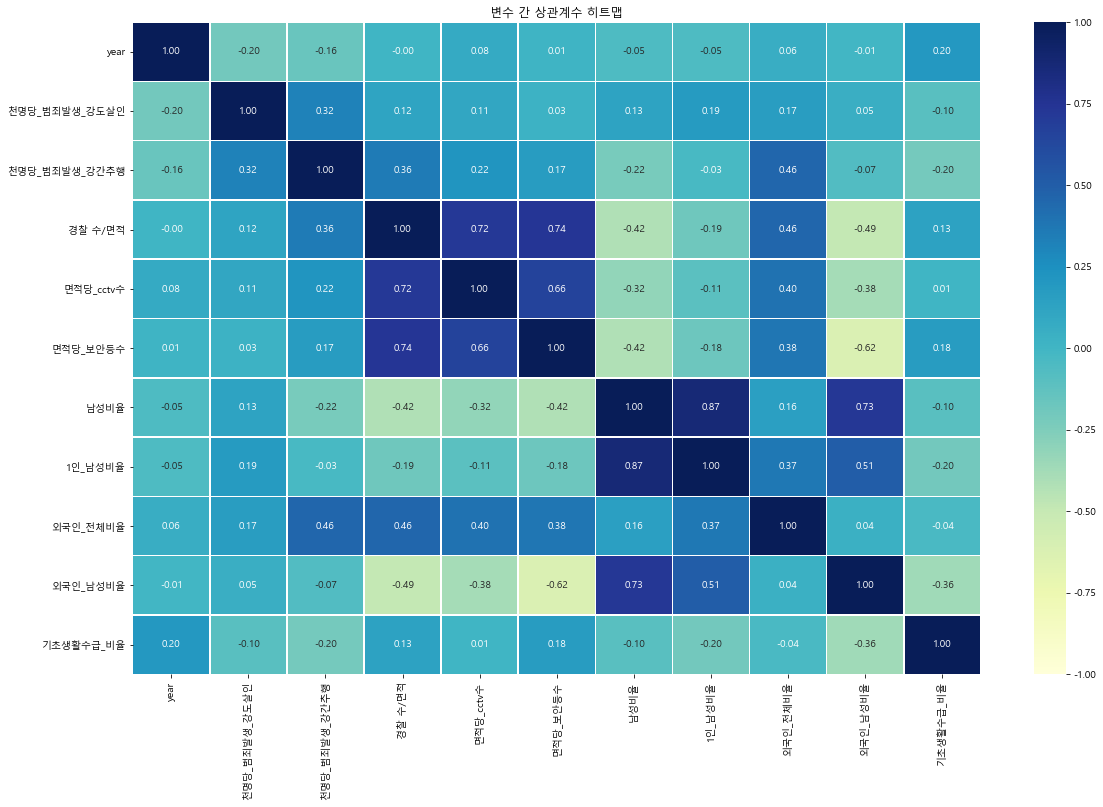

In [12]:
# 히트맵을 이용한 상관분석
plt.figure(figsize=(19,12))
sns.heatmap(data=df2_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='YlGnBu', vmin = -1, vmax=1)
plt.title('변수 간 상관계수 히트맵')
plt.show()

## 회귀 분석

In [13]:
# 통계 및 회귀 분석
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [14]:
# 정답 제거
df2_scaled_data = df2_scaled
df2_scaled_data

,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
0,-1.46385,-0.518174,-0.769165,-1.229674,-1.326108,-1.199226,0.961697,0.137979,-0.830226,1.330305,-0.334887
1,-0.87831,-0.518174,-0.648213,-1.229674,-1.311719,-1.199226,0.941864,0.117104,-0.824727,1.274584,-0.297609
2,-0.29277,-0.518174,-0.754457,-1.229674,-1.288857,-1.199226,0.921732,0.097387,-0.819085,1.223929,-0.294049
3,0.29277,-0.518174,-0.629997,-1.229674,-1.281057,-1.199226,0.868567,-0.014589,-0.805249,1.069018,-0.104465
4,0.87831,-0.518174,-0.502155,-1.229674,-1.260347,-1.199226,0.813727,-0.123880,-0.790877,0.921650,0.229262
...,...,...,...,...,...,...,...,...,...,...,...
281,-0.87831,-0.518174,-0.618683,-1.222024,-1.298474,-1.351504,2.304677,1.512135,-0.592315,2.659605,-0.687279
282,-0.29277,0.501805,-0.812669,-1.222024,-1.288905,-1.351504,2.281748,1.457081,-0.579614,2.523152,-0.712682
283,0.29277,0.507501,-0.939924,-1.222024,-1.277784,-1.351504,2.253262,1.379817,-0.571215,2.433525,-0.571990
284,0.87831,-0.518174,-0.806853,-1.222024,-1.239248,-1.351504,2.225089,1.308168,-0.562808,2.346304,-0.313424


In [15]:
# 학습용, 테스트용 데이터 자르기
X_train, X_test, y_train, y_test = train_test_split(df2_scaled_data, df2['mur_safety_q2'], test_size=0.25, random_state=1)
display(X_train)
display(y_train)

,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
115,0.29277,-0.518174,-0.883053,-0.098961,1.895551,0.216655,-1.067359,-1.046484,-0.679047,0.378510,-1.600319
277,0.87831,-0.518174,-0.618821,-1.333434,-1.348335,-1.347835,1.665364,1.412583,-0.635116,1.274485,-0.561513
54,1.46385,-0.518174,-0.298980,0.080195,2.043750,0.548002,-0.716855,-0.136574,0.547296,-0.685562,0.059818
227,0.29277,-0.518174,0.997963,2.087364,0.408521,2.510394,-0.487013,0.256064,1.252792,-0.633970,-0.309743
46,0.87831,0.895253,0.104410,0.022462,0.621853,0.473895,0.784477,1.031416,0.298829,-0.378289,0.279711
...,...,...,...,...,...,...,...,...,...,...,...
159,1.46385,-0.518174,-0.811525,0.090156,-0.303106,-0.093979,-0.723576,-0.832982,-0.754535,-0.203078,-0.749574
84,-1.46385,-0.518174,-0.782670,-0.275839,-0.751119,0.002713,-0.388607,-0.937432,-1.009221,-1.299720,0.548404
163,-0.29277,-0.518174,-0.164568,-0.344013,0.126379,-0.908938,-1.023838,-1.400812,-0.714966,0.406198,-0.624976
274,-0.87831,-0.518174,-0.242847,-1.333434,-1.367649,-1.347835,1.733432,1.421277,-0.641466,1.601893,-0.837383


115    84.7
277    81.2
54     78.1
227    73.0
46     76.1
       ... 
159    86.0
84     79.2
163    83.1
274    79.4
43     75.3
Name: mur_safety_q2, Length: 184, dtype: float64

In [16]:
linear_model = sm.OLS(y_train, sm.add_constant(X_train))
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:          mur_safety_q2   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     16.43
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           8.68e-22
Time:                        17:39:02   Log-Likelihood:                -426.01
No. Observations:                 184   AIC:                             876.0
Df Residuals:                     172   BIC:                             914.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            78.9265      0.189    417.215

In [17]:
# 각 변수들의 p-value 데이터 프레임을 생성
df_pvalue = pd.DataFrame(linear_result.summary2().tables[1]['P>|t|'].round(2))
df_pvalue.drop('const',axis=0, inplace=True)
# 각 변수들의 VIF 데이터프레임 생성VIF 데이터프레임 생성
vif_xtrain = pd.DataFrame()
vif_xtrain["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_xtrain.index  = X_train.columns
vif_xtrain["VIF_Factor"]= round(vif_xtrain["VIF_Factor"],2)
# 두 데이터프레임 합치기
df_visual1 = df_pvalue.join(vif_xtrain, how='left')
df_visual1

,P>|t|,VIF_Factor
year,0.00,1.31
천명당_범죄발생_강도살인,0.43,1.24
천명당_범죄발생_강간추행,0.66,2.12
경찰 수/면적,0.04,3.27
면적당_cctv수,0.00,2.33
면적당_보안등수,0.14,3.12
남성비율,0.00,16.13
1인_남성비율,0.54,9.89
외국인_전체비율,0.01,2.57
외국인_남성비율,0.00,5.04


In [18]:
# 다중공선성이 높은변수들이 제거된 후 사용할 변수 리턴 함수
def feature_engineering_VIF(X_train, num) :
    '''
    X_train : 들어가는 df
    num : 상위 몇개 까지 쓸 것 인지의 파라미터
    '''
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor',ascending=True)['Feature'][:num].values
    return X_colname_vif

In [19]:
[variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]

[1.3140523703938445,
 1.2399620448561643,
 2.1190025491948816,
 3.2654946747964626,
 2.3282405694299833,
 3.1229231437287948,
 16.133505253601182,
 9.894037064150492,
 2.565319852257914,
 5.039424302166956,
 1.9188883710831457]

In [20]:
feature_engineering_VIF(X_train,10)

array(['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
       '외국인_전체비율', '면적당_보안등수', '경찰 수/면적', '외국인_남성비율', '1인_남성비율'],
      dtype=object)

In [21]:
# scaler2 = StandardScaler()
# scaler2.fit(df2[['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
#        '면적당_보안등수', '경찰 수/면적', '외국인_전체비율', '외국인_남성비율']])
# df2_scaled2 = scaler2.transform(df2[['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
#        '면적당_보안등수', '경찰 수/면적', '외국인_전체비율', '외국인_남성비율']])
# df2_scaled2 = pd.DataFrame(df2_scaled2, index=df2.index, columns=['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
#        '면적당_보안등수', '경찰 수/면적', '외국인_전체비율', '외국인_남성비율'])
# df2_scaled2

In [22]:
# 위의 변수 선택법으로 선택된 변수들로 새로운 데이터 생성
X_train2 = X_train[['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
       '외국인_전체비율', '면적당_보안등수', '경찰 수/면적', '외국인_남성비율', '1인_남성비율']]
X_train2

,천명당_범죄발생_강도살인,year,기초생활수급_비율,천명당_범죄발생_강간추행,면적당_cctv수,외국인_전체비율,면적당_보안등수,경찰 수/면적,외국인_남성비율,1인_남성비율
115,-0.518174,0.29277,-1.600319,-0.883053,1.895551,-0.679047,0.216655,-0.098961,0.378510,-1.046484
277,-0.518174,0.87831,-0.561513,-0.618821,-1.348335,-0.635116,-1.347835,-1.333434,1.274485,1.412583
54,-0.518174,1.46385,0.059818,-0.298980,2.043750,0.547296,0.548002,0.080195,-0.685562,-0.136574
227,-0.518174,0.29277,-0.309743,0.997963,0.408521,1.252792,2.510394,2.087364,-0.633970,0.256064
46,0.895253,0.87831,0.279711,0.104410,0.621853,0.298829,0.473895,0.022462,-0.378289,1.031416
...,...,...,...,...,...,...,...,...,...,...
159,-0.518174,1.46385,-0.749574,-0.811525,-0.303106,-0.754535,-0.093979,0.090156,-0.203078,-0.832982
84,-0.518174,-1.46385,0.548404,-0.782670,-0.751119,-1.009221,0.002713,-0.275839,-1.299720,-0.937432
163,-0.518174,-0.29277,-0.624976,-0.164568,0.126379,-0.714966,-0.908938,-0.344013,0.406198,-1.400812
274,-0.518174,-0.87831,-0.837383,-0.242847,-1.367649,-0.641466,-1.347835,-1.333434,1.601893,1.421277


In [23]:
# 최종선택된 변수들의 다중공선성 확인 -> 모두 10보다 작으므로 해결되었다
vif_xtrain2 = pd.DataFrame()
vif_xtrain2["VIF_Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_xtrain2.index  = X_train2.columns
vif_xtrain2["VIF_Factor"]= round(vif_xtrain2["VIF_Factor"],2)
vif_xtrain2

,VIF_Factor
천명당_범죄발생_강도살인,1.20
year,1.21
기초생활수급_비율,1.31
천명당_범죄발생_강간추행,1.85
면적당_cctv수,2.31
외국인_전체비율,2.56
면적당_보안등수,3.12
경찰 수/면적,3.21
외국인_남성비율,2.50
1인_남성비율,1.93


In [24]:
# 선형 회귀를 위해 선택된 변수들로 test데이터 재생성
X_test2 = X_test[['천명당_범죄발생_강도살인', 'year', '기초생활수급_비율', '천명당_범죄발생_강간추행', '면적당_cctv수',
       '외국인_전체비율', '면적당_보안등수', '경찰 수/면적', '외국인_남성비율', '1인_남성비율']]
X_test2

,천명당_범죄발생_강도살인,year,기초생활수급_비율,천명당_범죄발생_강간추행,면적당_cctv수,외국인_전체비율,면적당_보안등수,경찰 수/면적,외국인_남성비율,1인_남성비율
78,0.147919,-0.87831,1.964886,-0.611949,-0.854210,-0.950289,-0.939270,-0.409680,-0.700238,-1.504415
285,-0.518174,1.46385,-0.175847,-0.870855,-1.226317,-0.596985,-1.351504,-1.222024,2.127039,1.341322
242,1.412255,0.87831,-1.506911,0.078087,-0.276188,-0.195342,-1.065937,-0.584412,0.353203,1.861016
259,0.497907,-1.46385,0.728502,-0.621256,-1.383975,-0.758384,-1.457283,-1.366140,1.669158,-0.368946
105,0.454844,-1.46385,-0.779098,1.138916,-0.865818,-0.245854,-0.208149,-0.038550,-1.068206,-0.950504
...,...,...,...,...,...,...,...,...,...,...
32,-0.518174,0.87831,3.115825,-0.281331,-0.476311,-0.707616,0.247951,-0.150612,-1.471498,-0.639369
18,-0.518174,0.87831,-0.452982,1.620890,1.744593,-0.660804,0.530604,1.553217,0.773870,-1.384462
284,-0.518174,0.87831,-0.313424,-0.806853,-1.239248,-0.562808,-1.351504,-1.222024,2.346304,1.308168
270,-0.518174,0.87831,0.255310,-0.853229,-1.301133,-0.453402,-1.369681,-1.304582,2.034380,1.854614


In [25]:
linear_model2 = sm.OLS(y_train, sm.add_constant(X_train2))
linear_result2 = linear_model2.fit()
print(linear_result2.summary())

                            OLS Regression Results                            
Dep. Variable:          mur_safety_q2   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.09e-19
Time:                        17:39:03   Log-Likelihood:                -433.05
No. Observations:                 184   AIC:                             888.1
Df Residuals:                     173   BIC:                             923.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            78.9112      0.196    402.738

In [26]:
# 평가 함수 생성
def MAE_func(test, pred):
    rms = mean_absolute_error(test, pred)
    return rms

## Linear Regression

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train2,y_train)
print(lr_model.score(X_train2, y_train))
print(lr_model.score(X_test2, y_test))

y_pred = lr_model.predict(X_test2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.4735913196111937
0.3970674126312037
2.6168776070952937
1.6176766076986135


## Ridge & Lasso

In [28]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

In [29]:
# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        X_train, y_train).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        X_train, y_train).best_estimator_,}

In [30]:
# Lasso 모델의 파라미터 
linear_models['Lasso']

Lasso(alpha=0.1)

In [31]:
# 결정계수와 오차
print(linear_models['Lasso'].score(X_train,y_train))
print(linear_models['Lasso'].score(X_test,y_test))

y_pred = linear_models['Lasso'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.4937738547606304
0.3723163934924738
2.670050191709111
1.6340288221782109


In [32]:
linear_models['Ridge']

Ridge(alpha=10.0)

In [33]:
# 결정계수와 오차
print(linear_models['Ridge'].score(X_train,y_train))
print(linear_models['Ridge'].score(X_test,y_test))

y_pred = linear_models['Ridge'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5030097969424293
0.3940165319544874
2.623490043827055
1.6197191249803329


## Random Forest

In [34]:
# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [100,200],
    'max_depth': [4, 6, 8, 10, 12]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
RF_models = {
    'RF':GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [35]:
RF_models['RF']

RandomForestRegressor(max_depth=12, n_estimators=200, random_state=42)

In [36]:
# 결정계수와 오차
print(RF_models['RF'].score(X_train,y_train))
print(RF_models['RF'].score(X_test,y_test))

y_pred = RF_models['RF'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9259778839598989
0.4354050261268062
2.5323138838341137
1.5913245689783444


## XGBoost

In [37]:
# parameter 범위를 정의한다.
XGB_params = {
    'n_estimators':[100,200],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
XGB_models = {
    'XGB':GridSearchCV(
    xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}
# XGB_models = {
#     'XGB':GridSearchCV(
#     xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).cv_results_
# }

In [38]:
XGB_models['XGB']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
# 결정계수와 오차
print(XGB_models['XGB'].score(X_train,y_train))
print(XGB_models['XGB'].score(X_test,y_test))

y_pred = XGB_models['XGB'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9999998521568711
0.4681604047683532
2.4577594004978147
1.5677242743855868


## LightGBM

In [40]:
# parameter 범위를 정의한다.
LGBM_params = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01, 0.05, 0.1],
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
LGBM_models = {
    'LGBM':GridSearchCV(
    LGBMRegressor(random_state=42), param_grid=LGBM_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}


In [41]:
LGBM_models['LGBM']

LGBMRegressor(max_depth=3, random_state=42)

In [42]:
# 결정계수와 오차
print(LGBM_models['LGBM'].score(X_train,y_train))
print(LGBM_models['LGBM'].score(X_test,y_test))

y_pred = LGBM_models['LGBM'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.8291259427414639
0.45879297738116553
2.4793094966350746
1.5745823245023025


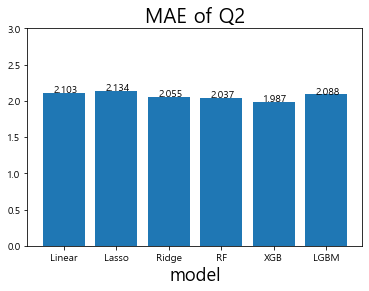

In [43]:
lr_pred = lr_model.predict(X_test2)
Lasso_pred = linear_models['Lasso'].predict(X_test)
Ridge_pred = linear_models['Ridge'].predict(X_test)
RF_pred = RF_models['RF'].predict(X_test)
XGB_pred = XGB_models['XGB'].predict(X_test)
LGBM_pred = LGBM_models['LGBM'].predict(X_test)

# test 데이터의 MSE 계산
mse_score = [MAE_func(y_test, lr_pred),
             MAE_func(y_test, Lasso_pred),
             MAE_func(y_test, Ridge_pred),
             MAE_func(y_test, RF_pred),
             MAE_func(y_test, XGB_pred),
             MAE_func(y_test, LGBM_pred)]

x_lab = ['Linear','Lasso','Ridge','RF','XGB','LGBM']

plt.bar(x_lab, mse_score)
plt.title('MAE of Q2', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('',fontsize=18)
plt.ylim(0.0, 3.0)

for i, v in enumerate(mse_score) :
    plt.text(i-0.2, v+0.01, str(np.round(v,3)))
    
plt.show()

In [44]:
df_p

,police,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율,mur_safety_q2
6,마산동부경찰서,6,0.000000,0.026138,2.003503,13.190634,61.155591,0.501534,0.478467,0.014104,0.537064,0.032035,NaN
13,마산중부경찰서,6,0.000000,0.017073,0.605026,3.881541,29.062562,0.497496,0.457956,0.016111,0.583539,0.034874,NaN
20,서울강남경찰서,6,0.000000,0.103852,34.607520,254.418700,413.399562,0.478456,0.426766,0.017206,0.497090,0.023415,NaN
27,서울강동경찰서,6,0.002174,0.021741,16.761537,108.459510,319.876653,0.491806,0.473348,0.014320,0.455746,0.025845,NaN
34,서울강북경찰서,6,0.000000,0.038954,14.645660,97.032775,355.843118,0.487390,0.458750,0.016828,0.374614,0.057960,NaN
41,서울강서경찰서,6,0.001724,0.034472,13.055378,62.065265,223.847505,0.482663,0.454185,0.015343,0.433610,0.042357,NaN
48,서울관악경찰서,6,0.004040,0.052519,16.673374,163.182612,401.851979,0.501634,0.523589,0.048673,0.455345,0.033984,NaN
55,서울광진경찰서,6,0.000000,0.046152,17.349773,294.900488,416.942446,0.482604,0.474631,0.057638,0.440146,0.029580,NaN
62,서울구로경찰서,6,0.000000,0.037091,19.629189,181.830895,387.813147,0.493741,0.492143,0.112782,0.542228,0.025811,NaN
69,서울금천경찰서,6,0.000000,0.043153,21.155319,326.286058,483.329561,0.505867,0.539684,0.117014,0.533855,0.044978,NaN


In [45]:
data_p = df_p.iloc[:,:-1]

In [47]:
data_p_scaled = scaler.transform(data_p.iloc[:,1:])
data_p_scaled

array([[ 2.04939015e+00, -5.18173848e-01, -7.35206451e-01,
        -1.22967398e+00, -1.24071248e+00, -1.19922601e+00,
         8.89780376e-01, -7.45554806e-02, -8.16222058e-01,
         5.83997230e-01,  6.44544655e-01],
       [ 2.04939015e+00, -5.18173848e-01, -9.41620118e-01,
        -1.34903996e+00, -1.35631062e+00, -1.35683118e+00,
         5.36435193e-01, -5.92516821e-01, -7.53745017e-01,
         1.23610695e+00,  9.63649504e-01],
       [ 2.04939015e+00, -5.18173848e-01,  1.03426793e+00,
         1.55321741e+00,  1.75480128e+00,  5.30603598e-01,
        -1.12947673e+00, -1.38014971e+00, -7.19663144e-01,
         2.30959600e-02, -3.24340943e-01],
       [ 2.04939015e+00,  2.62070221e-01, -8.35343628e-01,
         2.99868935e-02, -5.76858341e-02,  7.13233528e-02,
         3.85796016e-02, -2.03811980e-01, -8.09491991e-01,
        -5.57016054e-01, -5.11900858e-02],
       [ 2.04939015e+00, -5.18173848e-01, -4.43404315e-01,
        -1.50612146e-01, -1.99580360e-01,  2.47950526e-01,
  

In [52]:
data_p_scaled = pd.DataFrame(data_p_scaled , columns=df2_scaled.columns)
data_p_scaled

,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율
0,2.04939,-0.518174,-0.735206,-1.229674,-1.240712,-1.199226,0.889780,-0.074555,-0.816222,0.583997,0.644545
1,2.04939,-0.518174,-0.941620,-1.349040,-1.356311,-1.356831,0.536435,-0.592517,-0.753745,1.236107,0.963650
2,2.04939,-0.518174,1.034268,1.553217,1.754801,0.530604,-1.129477,-1.380150,-0.719663,0.023096,-0.324341
3,2.04939,0.262070,-0.835344,0.029987,-0.057686,0.071323,0.038580,-0.203812,-0.809492,-0.557016,-0.051190
4,2.04939,-0.518174,-0.443404,-0.150612,-0.199580,0.247951,-0.347785,-0.572460,-0.731426,-1.695414,3.558378
5,2.04939,0.100403,-0.545463,-0.286350,-0.633799,-0.400265,-0.761379,-0.687751,-0.777649,-0.867612,1.804664
6,2.04939,0.931706,-0.134544,0.022462,0.621853,0.473895,0.898514,1.064908,0.259930,-0.562641,0.863540
7,2.04939,-0.518174,-0.279518,0.080195,2.257495,0.548002,-0.766597,-0.171418,0.539017,-0.775907,0.368631
8,2.04939,-0.518174,-0.485820,0.274753,0.853423,0.404952,0.207928,0.270793,2.255711,0.656443,-0.055079
9,2.04939,-0.518174,-0.347796,0.405015,2.647233,0.874022,1.268847,1.471358,2.387452,0.538957,2.099283


In [53]:
# data_p_scaled = scaler.transform(data_p.iloc[:,1:])
predict = XGB_models['XGB'].predict(data_p_scaled)
predict = list(predict)
predict

[76.63677,
 80.83407,
 82.165,
 79.7828,
 75.25436,
 76.3765,
 72.865585,
 78.8058,
 76.526726,
 69.59022,
 76.04719,
 80.00354,
 76.79338,
 75.500946,
 77.633194,
 82.22423,
 83.8289,
 79.790504,
 79.591515,
 83.70982,
 80.37154,
 82.35527,
 81.98705,
 84.21983,
 79.6379,
 77.8555,
 83.18209,
 80.34027,
 83.54892,
 78.38781,
 74.21915,
 75.856316,
 76.516365,
 80.01185,
 79.90148,
 73.577576,
 78.183075,
 77.866,
 79.13619,
 81.30645,
 79.74696]

In [54]:
data_p['예측결과'] = predict
data_p

,police,year,천명당_범죄발생_강도살인,천명당_범죄발생_강간추행,경찰 수/면적,면적당_cctv수,면적당_보안등수,남성비율,1인_남성비율,외국인_전체비율,외국인_남성비율,기초생활수급_비율,예측결과
6,마산동부경찰서,6,0.000000,0.026138,2.003503,13.190634,61.155591,0.501534,0.478467,0.014104,0.537064,0.032035,76.636772
13,마산중부경찰서,6,0.000000,0.017073,0.605026,3.881541,29.062562,0.497496,0.457956,0.016111,0.583539,0.034874,80.834068
20,서울강남경찰서,6,0.000000,0.103852,34.607520,254.418700,413.399562,0.478456,0.426766,0.017206,0.497090,0.023415,82.165001
27,서울강동경찰서,6,0.002174,0.021741,16.761537,108.459510,319.876653,0.491806,0.473348,0.014320,0.455746,0.025845,79.782799
34,서울강북경찰서,6,0.000000,0.038954,14.645660,97.032775,355.843118,0.487390,0.458750,0.016828,0.374614,0.057960,75.254356
41,서울강서경찰서,6,0.001724,0.034472,13.055378,62.065265,223.847505,0.482663,0.454185,0.015343,0.433610,0.042357,76.376503
48,서울관악경찰서,6,0.004040,0.052519,16.673374,163.182612,401.851979,0.501634,0.523589,0.048673,0.455345,0.033984,72.865585
55,서울광진경찰서,6,0.000000,0.046152,17.349773,294.900488,416.942446,0.482604,0.474631,0.057638,0.440146,0.029580,78.805801
62,서울구로경찰서,6,0.000000,0.037091,19.629189,181.830895,387.813147,0.493741,0.492143,0.112782,0.542228,0.025811,76.526726
69,서울금천경찰서,6,0.000000,0.043153,21.155319,326.286058,483.329561,0.505867,0.539684,0.117014,0.533855,0.044978,69.590218


In [55]:
result_pred = data_p[['police','예측결과']]
result_pred.rename({'police':'경찰서명','예측결과':'문항2. 강도 살인 안전도(문항2 점수 * 10)'},axis=1,inplace=True)
result_pred

/opt/app-root/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,경찰서명,문항2. 강도 살인 안전도(문항2 점수 * 10)
6,마산동부경찰서,76.636772
13,마산중부경찰서,80.834068
20,서울강남경찰서,82.165001
27,서울강동경찰서,79.782799
34,서울강북경찰서,75.254356
41,서울강서경찰서,76.376503
48,서울관악경찰서,72.865585
55,서울광진경찰서,78.805801
62,서울구로경찰서,76.526726
69,서울금천경찰서,69.590218


In [56]:
# result_pred.to_csv('문항2예측결과_7.csv',index=False,encoding='utf-8-sig')

In [57]:
result_pred.sort_values(by = '문항2. 강도 살인 안전도(문항2 점수 * 10)', ascending=False)

,경찰서명,문항2. 강도 살인 안전도(문항2 점수 * 10)
167,서울수서경찰서,84.219833
118,서울방배경찰서,83.828903
139,서울서초경찰서,83.709824
202,서울종로경찰서,83.548920
188,서울용산경찰서,83.182091
153,서울성북경찰서,82.355270
111,서울마포경찰서,82.224228
20,서울강남경찰서,82.165001
160,서울송파경찰서,81.987053
279,창원서부경찰서,81.306450


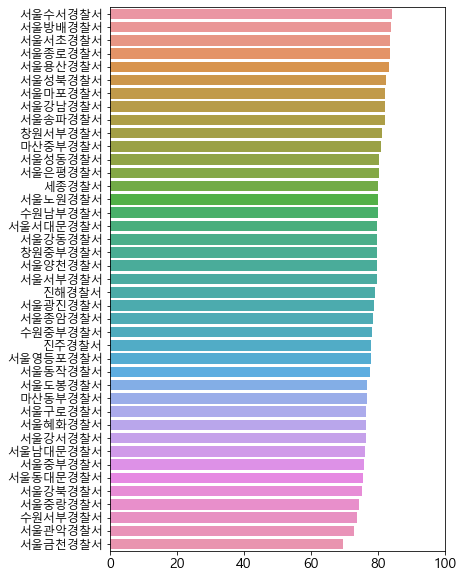

In [58]:
# 예측 시각화
plt.figure(figsize=(6,10))
sns.barplot(y='경찰서명',x='문항2. 강도 살인 안전도(문항2 점수 * 10)', data = result_pred.sort_values(by = '문항2. 강도 살인 안전도(문항2 점수 * 10)', ascending=False))
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,100)
plt.show()

# 변수별 중요도 시각화

In [59]:
# 독립변수 계수 상위 10개, 하위 10개 추출함수
def get_top_bottom_coef(model, features) :
    coef = pd.Series(model.coef_, index= features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(6)
    coef_low = coef.sort_values(ascending=False).tail(6)
    
    return coef_high, coef_low

In [60]:
# 계수를 시각화 - 모델별로 그림을 그린다. 
def visualize_coefficient(models, features=X_test2) :
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    pal = 'pastel'
    for idx, model in enumerate(models) :
        if model != lr_model :
            features = X_test
        coef_high, coef_low = get_top_bottom_coef(model, features)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axes[idx].set_title(model.__class__.__name__+' 변수중요도', size=25)
        axes[idx].tick_params(axis='y', direction='in', pad=-300)
        axes[idx].set_xlim(-8,8)
        for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()) :
            label.set_fontsize(22)
    
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axes[idx], palette=pal)

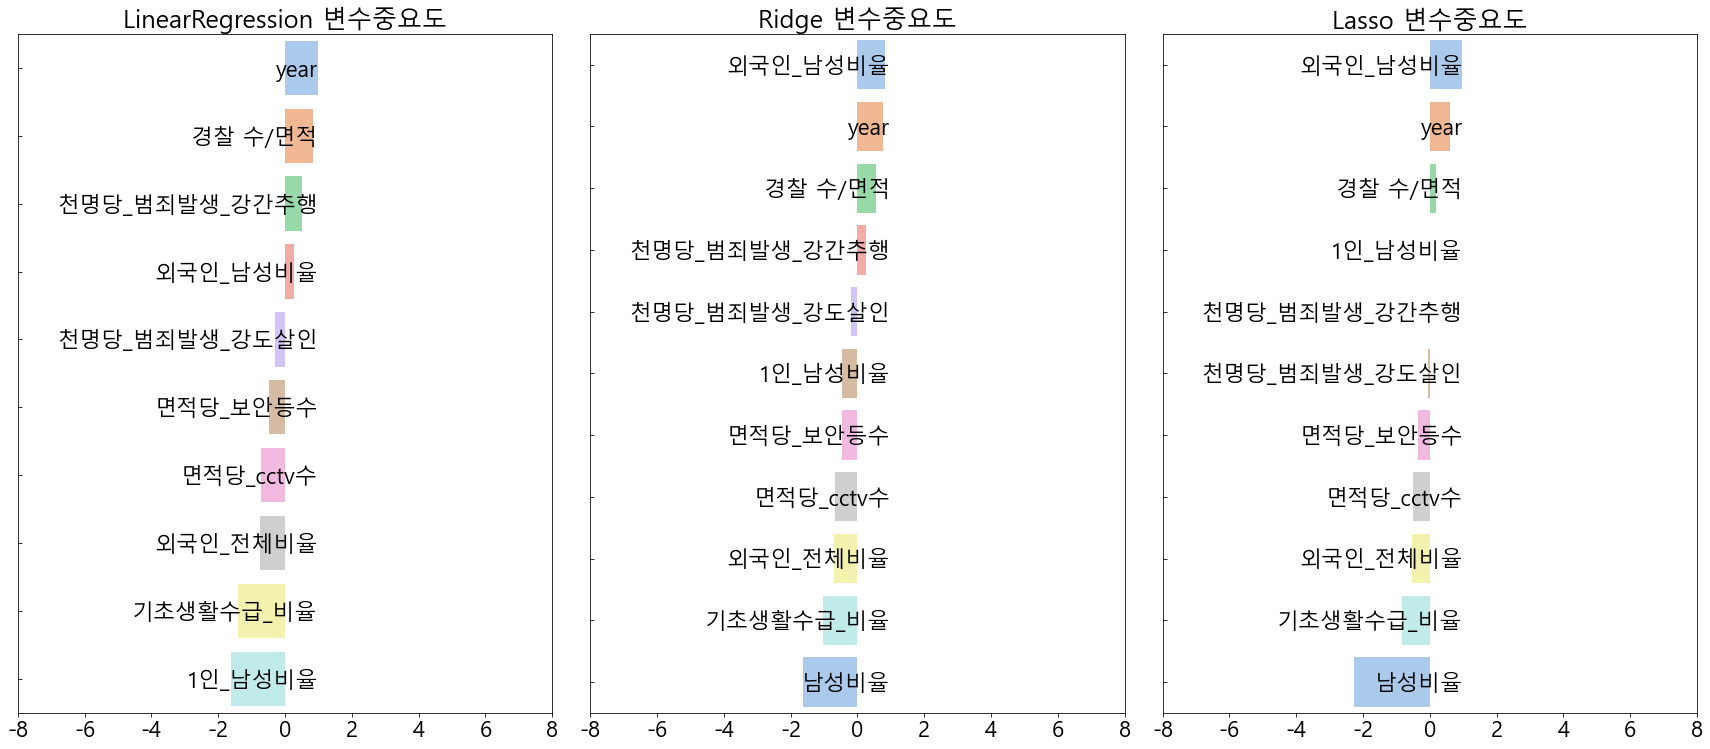

In [61]:
models = [lr_model, linear_models['Ridge'], linear_models['Lasso']]
visualize_coefficient(models, X_test2)

In [65]:
features = X_train.columns.values

In [66]:
x,y = (list(x) for x in zip(*sorted(zip(RF_models['RF'].feature_importances_, features), reverse=True)))

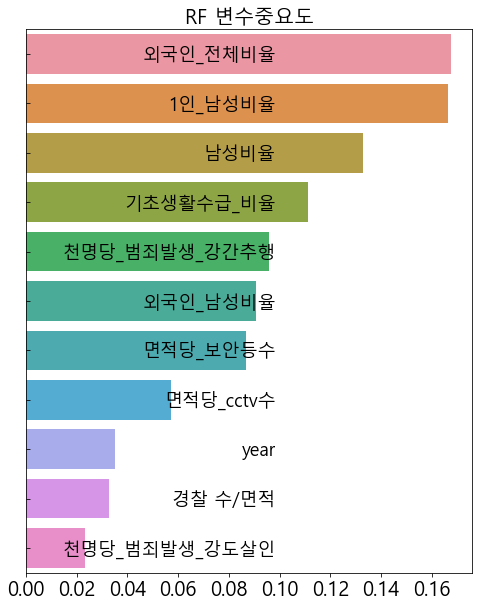

In [67]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('RF 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [68]:
x,y = (list(x) for x in zip(*sorted(zip(XGB_models['XGB'].feature_importances_, features), reverse=True)))

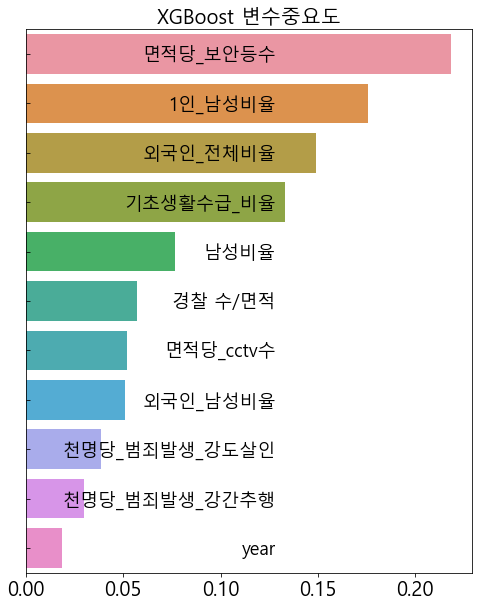

In [69]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('XGBoost 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [70]:
x,y = (list(x) for x in zip(*sorted(zip(LGBM_models['LGBM'].feature_importances_, features), reverse=True)))

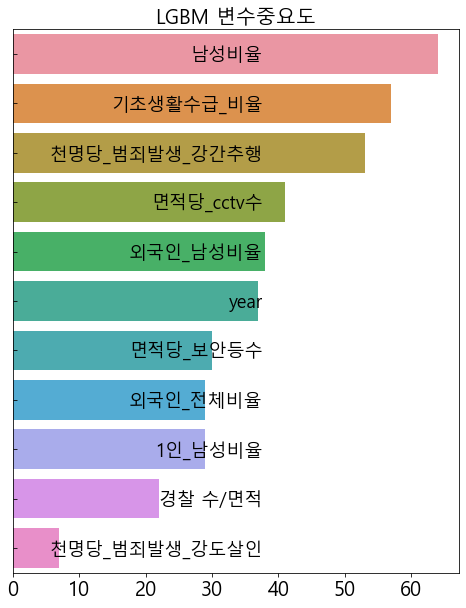

In [71]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-250)
plt.title('LGBM 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()